In [8]:
import torch as t
import torch.nn.functional as F
from torchvision import transforms
import torchmetrics

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np 
import pandas as pd

from PIL import Image
from tqdm import tqdm

import os
from os import path, getcwd, listdir, mkdir
import torch as t

In [3]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb} \n \\usepackage{color} \n \\usepackage{amsmath}"

In [9]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

In [10]:
data_path = path.join(getcwd(), "data", "seadragon")
results_path = path.join(getcwd(), "results", "seadragon")

# Natural Image 1

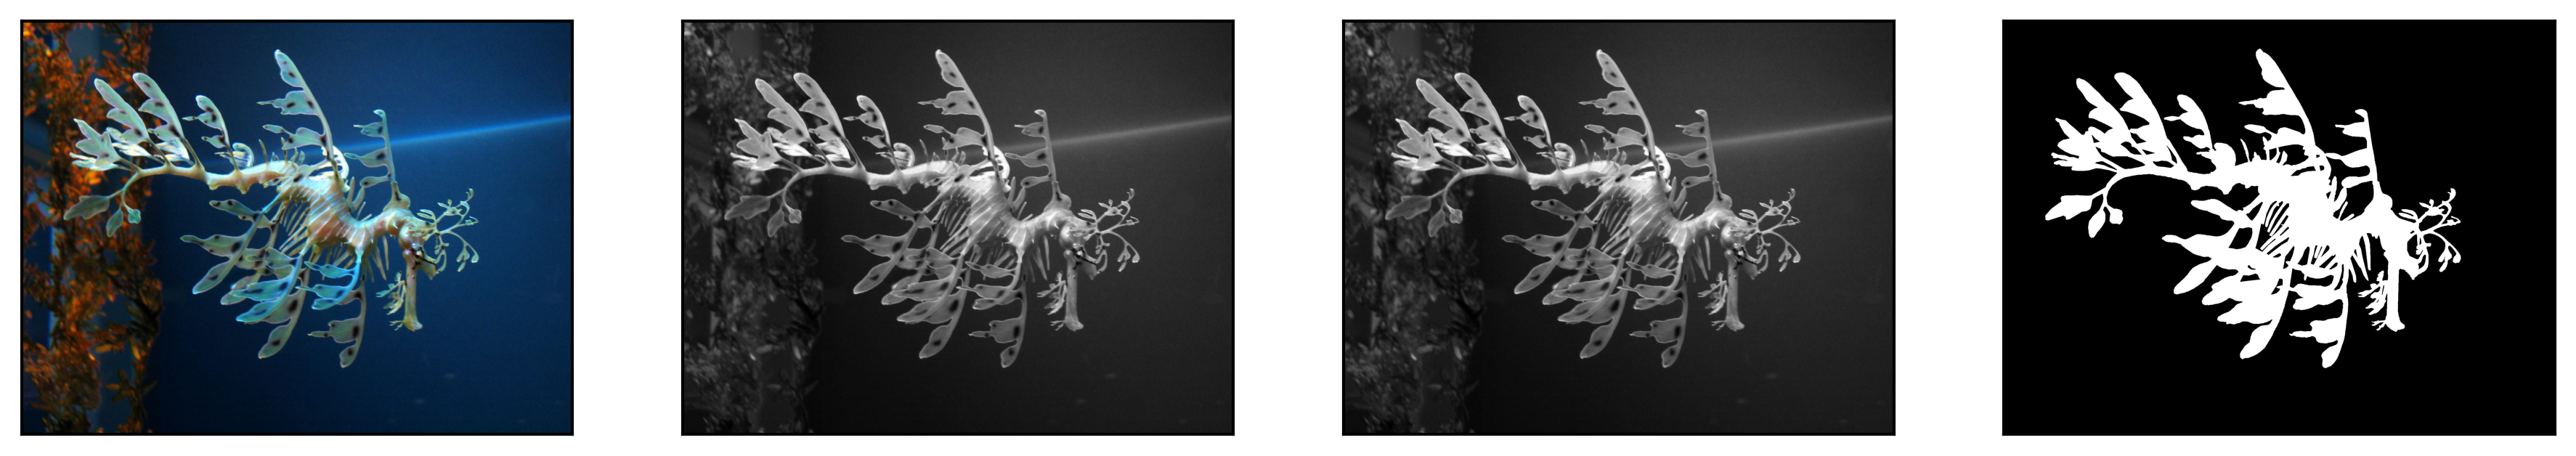

In [5]:
fig, axs = plt.subplots(1,4, dpi=300, figsize=(15,12))
input = Image.open(path.join(data_path, "img.jpg"))
labels = np.asarray(Image.open(path.join(data_path, "labels.png")))/255
grayscale = np.load(path.join(data_path, "grayscale.npy"))
centered = np.load(path.join(data_path, "centered_normed.npy"))
axs[0].imshow(input)
axs[1].imshow(grayscale, cmap=plt.cm.gray, vmin=0, vmax=1)
axs[2].imshow(centered.squeeze(), cmap=plt.cm.gray, vmin=0, vmax=1)
axs[3].imshow(labels, cmap=plt.cm.gray, vmin=0, vmax=1)

remove_ticklines(axs[0])
remove_ticklines(axs[1])
remove_ticklines(axs[2])
remove_ticklines(axs[3])

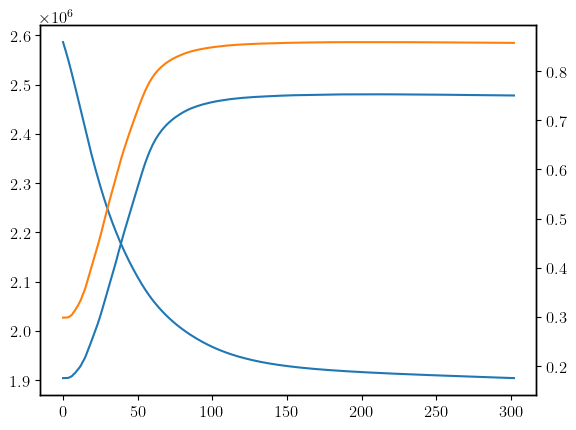

In [11]:
losses = np.load(path.join(results_path, "losses.npy"))
jaccard_scores = np.load(path.join(results_path, "jaccard_scores.npy"))
dice_scores = np.load(path.join(results_path, "dice_scores.npy"))
plt.plot(losses)
ax2 = plt.twinx()
ax2.plot(jaccard_scores)
ax2.plot(dice_scores)

In [12]:
for i in tqdm(range(0,losses.shape[0])):
    cont_grid = np.load(path.join(results_path, "grid_states", f"grid_{i}.npy")).squeeze()
    plt.imsave(path.join(results_path, "vis", f"{i}.png"), cont_grid, cmap=plt.cm.gray, vmin=0, vmax=1)
    disc_grid = cont_grid.copy()
    disc_grid[disc_grid > 0] = 1
    plt.imsave(path.join(results_path, "vis_disc", f"{i}.png"), disc_grid, cmap=plt.cm.gray, vmin=0, vmax=1)
    

100%|██████████| 303/303 [03:23<00:00,  1.49it/s]


In [13]:
import imageio

images = []
for i in tqdm(range(0,losses.shape[0])):
    images.append(imageio.imread(path.join(results_path, "vis", f"{i}.png")))

imageio.mimsave(path.join(results_path, "vis.gif"), images)

  0%|          | 0/303 [00:00<?, ?it/s]C:\Users\jsche\AppData\Local\Temp\ipykernel_8792\1145700444.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path.join(results_path, "vis", f"{i}.png")))
100%|██████████| 303/303 [00:25<00:00, 11.86it/s]


In [14]:
images = []
for i in tqdm(range(0,losses.shape[0])):
    images.append(imageio.imread(path.join(results_path, "vis_disc", f"{i}.png")))

imageio.mimsave(path.join(results_path, "vis_disc.gif"), images)

  0%|          | 0/303 [00:00<?, ?it/s]C:\Users\jsche\AppData\Local\Temp\ipykernel_8792\1544207950.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path.join(results_path, "vis_disc", f"{i}.png")))
100%|██████████| 303/303 [00:21<00:00, 13.83it/s]


# Cell imaging 1

In [15]:
data_path = path.join(getcwd(), "data", "cells1")
results_path = path.join(getcwd(), "results", "cells1")

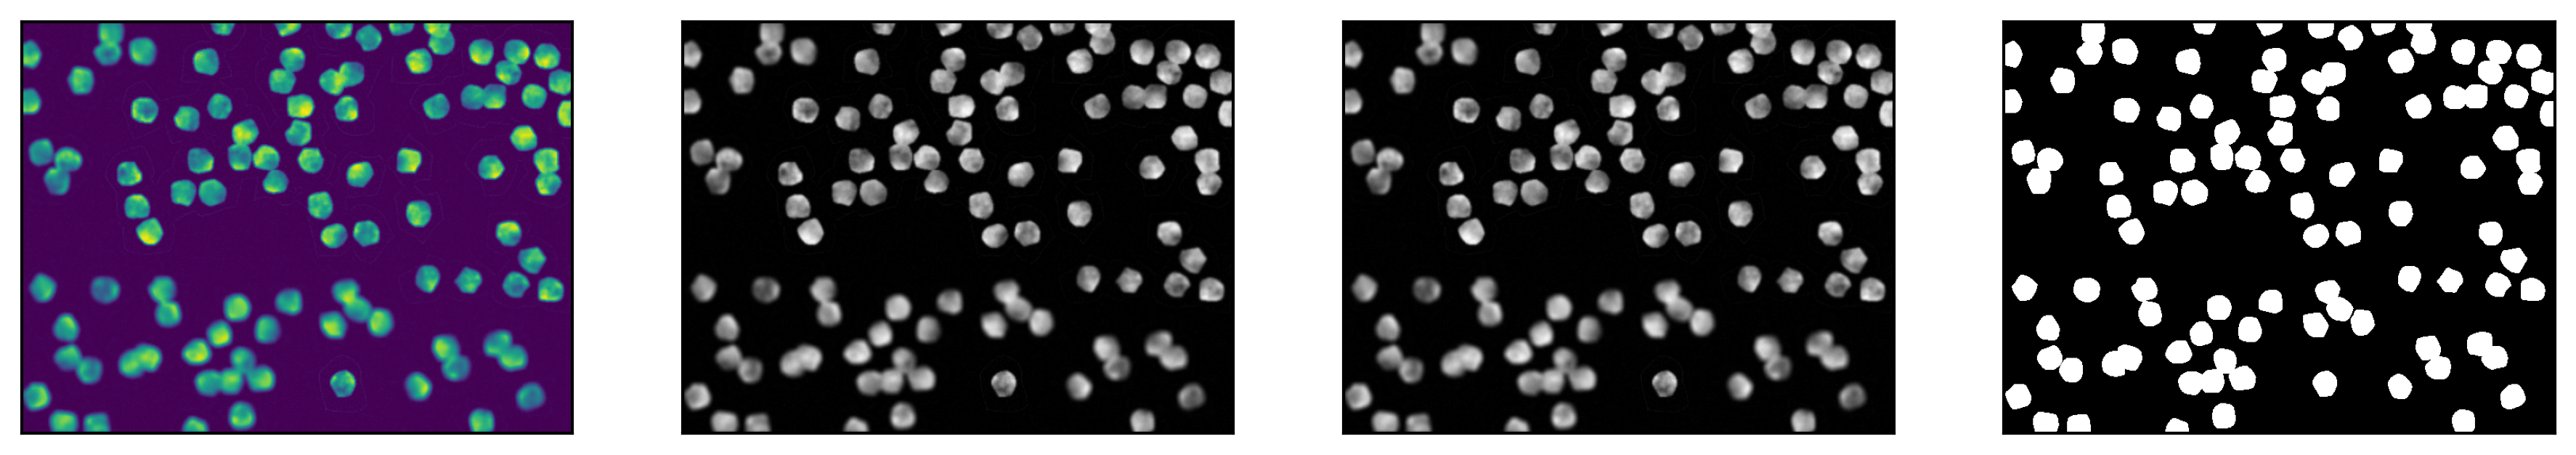

In [72]:
fig, axs = plt.subplots(1,4, dpi=300, figsize=(15,12))
input = Image.open(path.join(data_path, "img.TIF"))
labels = np.asarray(Image.open(path.join(data_path, "labels.TIF")))/255
grayscale = np.load(path.join(data_path, "grayscale.npy"))
centered = np.load(path.join(data_path, "centered_normed.npy"))
axs[0].imshow(input)
axs[1].imshow(grayscale, cmap=plt.cm.gray, vmin=0, vmax=1)
axs[2].imshow(centered.squeeze(), cmap=plt.cm.gray, vmin=0, vmax=1)
axs[3].imshow(labels, cmap=plt.cm.gray, vmin=0, vmax=1)

remove_ticklines(axs[0])
remove_ticklines(axs[1])
remove_ticklines(axs[2])
remove_ticklines(axs[3])

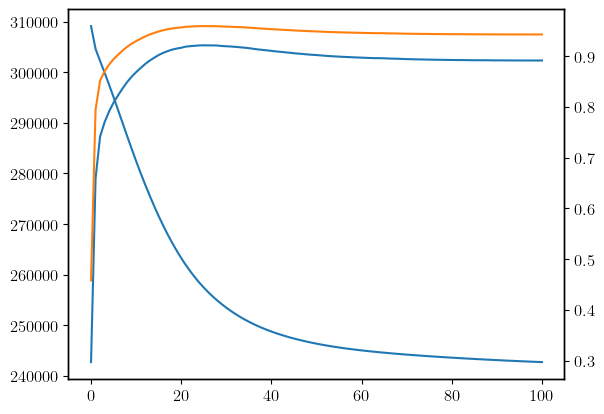

In [16]:
losses = np.load(path.join(results_path, "losses.npy"))
jaccard_scores = np.load(path.join(results_path, "jaccard_scores.npy"))
dice_scores = np.load(path.join(results_path, "dice_scores.npy"))
plt.plot(losses)
ax2 = plt.twinx()
ax2.plot(jaccard_scores)
ax2.plot(dice_scores)

In [17]:
for i in tqdm(range(0,losses.shape[0])):
    cont_grid = np.load(path.join(results_path, "grid_states", f"grid_{i}.npy")).squeeze()
    plt.imsave(path.join(results_path, "vis", f"{i}.png"), cont_grid, cmap=plt.cm.gray, vmin=0, vmax=1)
    disc_grid = cont_grid.copy()
    disc_grid[disc_grid > 0] = 1
    plt.imsave(path.join(results_path, "vis_disc", f"{i}.png"), disc_grid, cmap=plt.cm.gray, vmin=0, vmax=1)
    

100%|██████████| 101/101 [00:07<00:00, 13.13it/s]


In [18]:
images = []
for i in tqdm(range(0,losses.shape[0])):
    images.append(imageio.imread(path.join(results_path, "vis", f"{i}.png")))

imageio.mimsave(path.join(results_path, "vis.gif"), images)

  0%|          | 0/101 [00:00<?, ?it/s]C:\Users\jsche\AppData\Local\Temp\ipykernel_8792\3878276223.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path.join(results_path, "vis", f"{i}.png")))
100%|██████████| 101/101 [00:01<00:00, 66.06it/s]


In [98]:
images = []
for i in tqdm(range(0,losses.shape[0])):
    images.append(imageio.imread(path.join(results_path, "vis_disc", f"{i}.png")))

imageio.mimsave(path.join(results_path, "vis_disc.gif"), images, duration=0.2)

  0%|          | 0/101 [00:00<?, ?it/s]

C:\Users\jsche\AppData\Local\Temp\ipykernel_18048\3626511239.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path.join(results_path, "vis_disc", f"{i}.png")))
100%|██████████| 101/101 [00:01<00:00, 76.39it/s]


0.2983480393886566
0.8589059710502625
0.8573426008224487
0.4579263
25
0.9424572


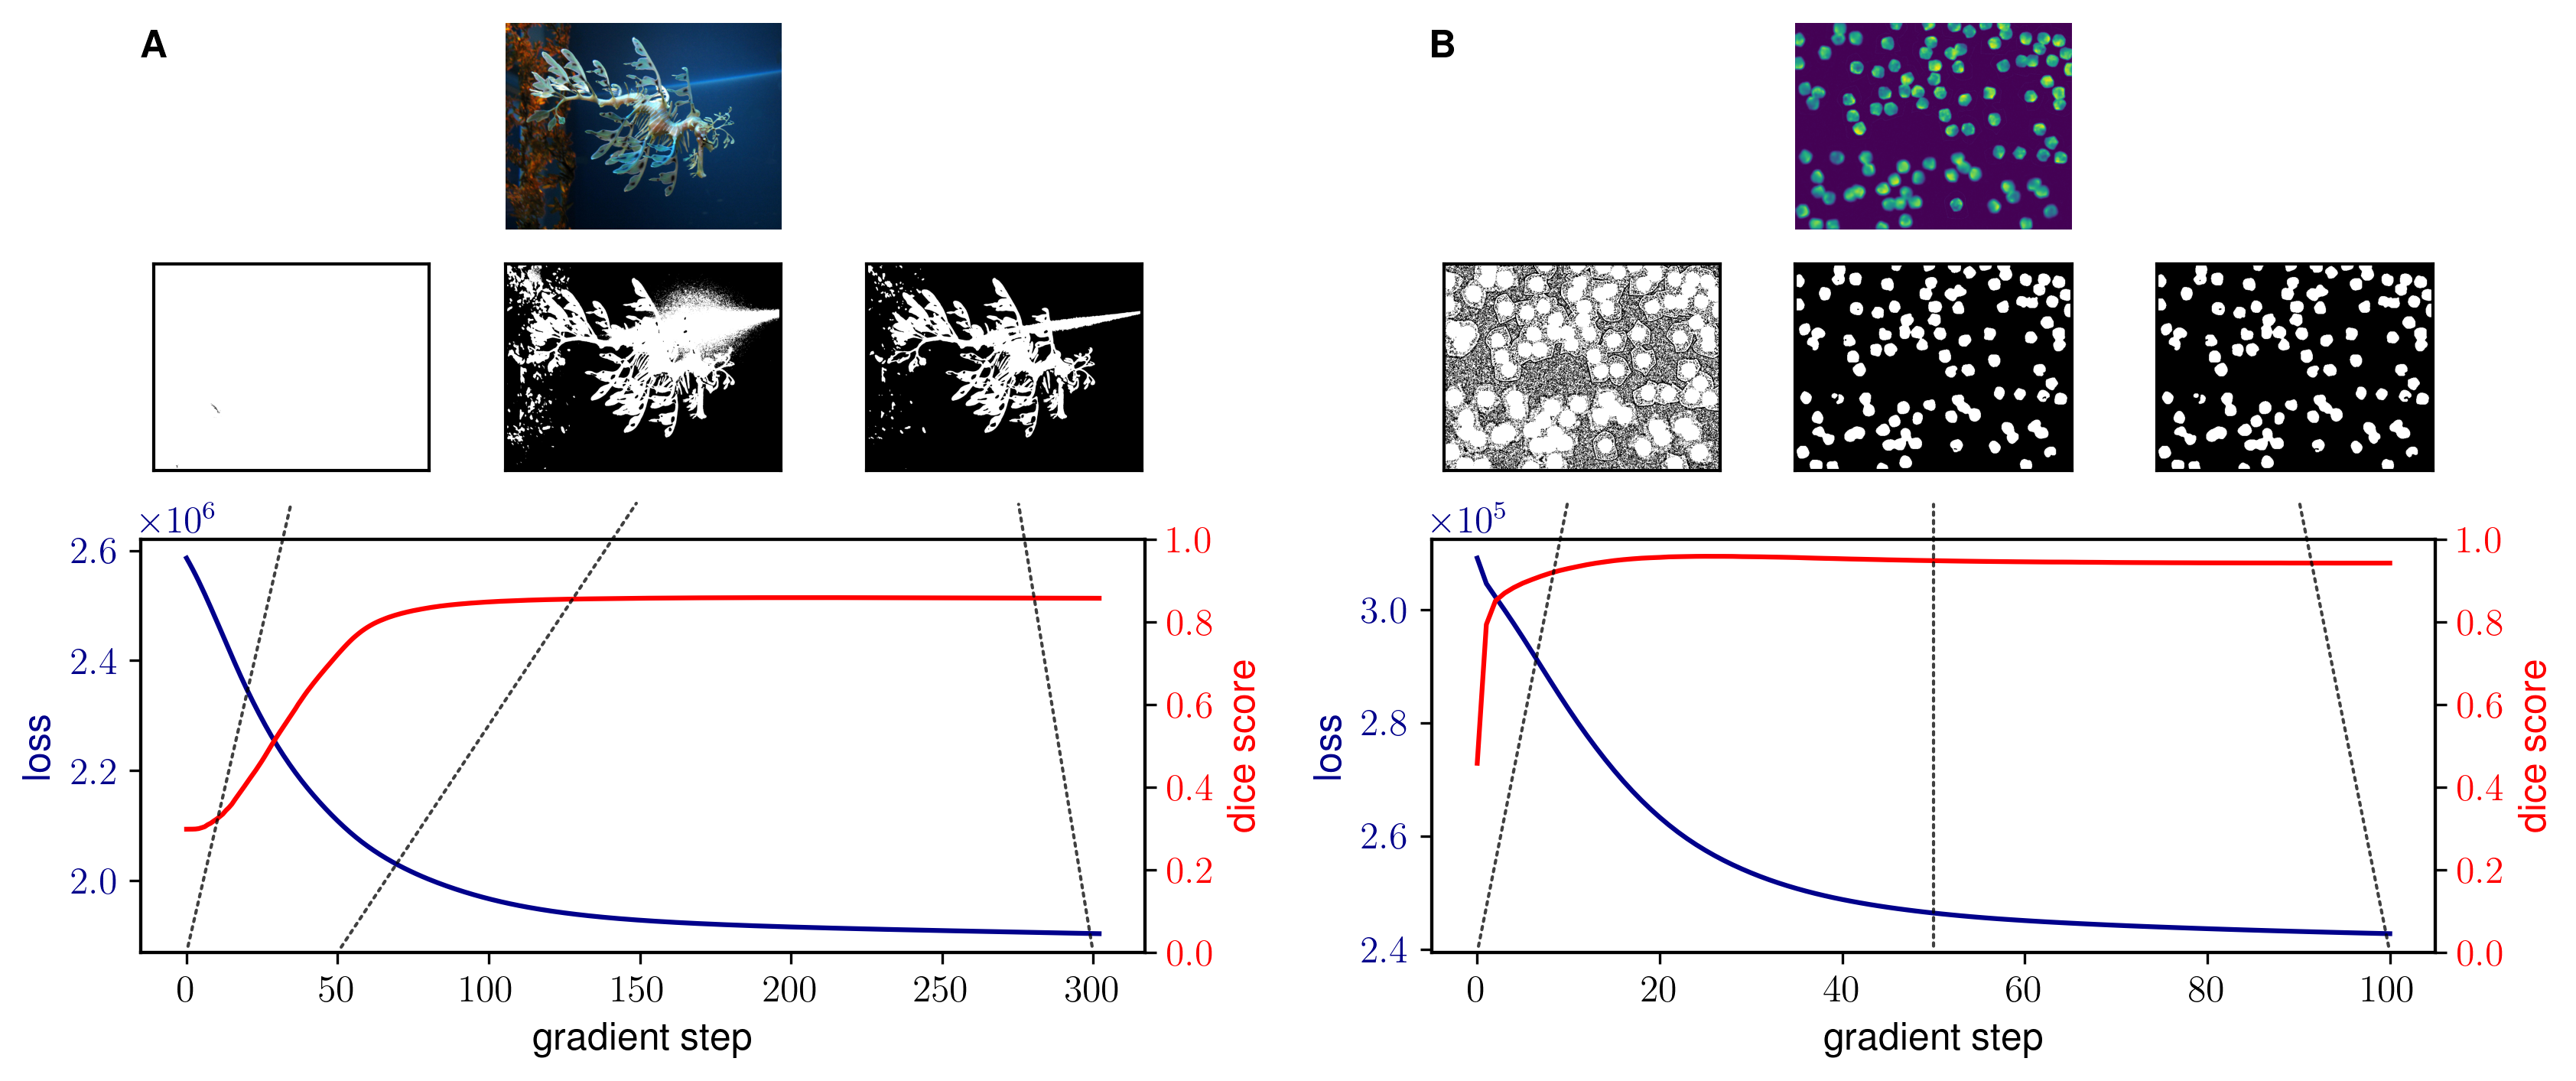

In [7]:

fig = plt.figure(figsize=(10,3), layout="constrained", dpi=300)
#fig.add_axes([0,0,1,1])
subfigs = fig.subfigures(1,2, wspace=0.25)

pic_size = 0.3


data_path = path.join(getcwd(), "data", "seadragon")
results_path = path.join(getcwd(), "results", "seadragon")

losses = np.load(path.join(results_path, "losses.npy"))

color = 'darkblue'
sd_axis = subfigs[0].add_axes([0,0,1.,0.6])
sd_axis.plot(losses, color=color)
sd_axis.set_ylabel("loss", color=color)
sd_axis.set_yscale("linear")
sd_axis.minorticks_off()
sd_axis.tick_params(axis='y', labelcolor=color)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))
sd_axis.yaxis.set_major_formatter(formatter)
sd_axis.set_xlabel("gradient step")

color = 'red'
sd_ax2 = sd_axis.twinx()
sd_ax2.set_ylabel("dice score", color=color)
dice_scores = np.load(path.join(results_path, "dice_scores.npy"))
print(dice_scores[0])
print(np.max(dice_scores))
print(dice_scores[-1])

sd_ax2.plot(dice_scores, color=color)
sd_ax2.tick_params(axis='y', labelcolor=color)
sd_ax2.set_ylim(0,1)

vis_path = path.join(results_path, "vis")
vis_disc_path = path.join(results_path, "vis_disc")

ref_axs = subfigs[0].add_axes([0.35,1.05, pic_size, pic_size])
im = plt.imread(path.join(data_path, "img.jpg"))
ref_axs.imshow(im)
ref_axs.axis("off")

start_axs = subfigs[0].add_axes([0,0.7,pic_size,pic_size])
im = plt.imread(path.join(vis_disc_path, "0.png"))
start_axs.imshow(im)
remove_ticklines(start_axs)
#start_axs2 = subfigs[0].add_axes([0,0.75,pic_size,pic_size])
#im = plt.imread(path.join(vis_path, "10.png"))
#start_axs2.imshow(im)
#remove_ticklines(start_axs2)

start_axs = subfigs[0].add_axes([0.35,0.7,pic_size,pic_size])
im = plt.imread(path.join(vis_disc_path, "50.png"))
start_axs.imshow(im)
remove_ticklines(start_axs)
#start_axs2 = subfigs[0].add_axes([0.4,0.75,pic_size,pic_size])
#im = plt.imread(path.join(vis_path, "40.png"))
#start_axs2.imshow(im)
#remove_ticklines(start_axs2)

start_axs = subfigs[0].add_axes([0.71,0.7,pic_size,pic_size])
im = plt.imread(path.join(vis_disc_path, "300.png"))
start_axs.imshow(im)
remove_ticklines(start_axs)
#start_axs2 = subfigs[0].add_axes([0.7,0.75,pic_size,pic_size])
#im = plt.imread(path.join(vis_path, "80.png"))
#start_axs2.imshow(im)
#remove_ticklines(start_axs2)

sd_ax2.annotate("",
    xy=(275,1.1),
    xytext=(300,0),
    arrowprops= {
        "arrowstyle": "-",
        "linestyle": "dotted",
        "alpha": 0.75
    },
    annotation_clip=False
)
sd_ax2.annotate("",
    xy=(35,1.1),
    xytext=(0,0),
    arrowprops= {
        "arrowstyle": "-",
        "linestyle": "dotted",
        "alpha": 0.75
    },
    annotation_clip=False
)
sd_ax2.annotate("",
    xy=(150,1.1),
    xytext=(50,0),
    arrowprops= {
        "arrowstyle": "-",
        "linestyle": "dotted",
        "alpha": 0.75
    },
    annotation_clip=False
)

#####
###
###     Subfigure 2: Cell segmentation
###
#####

data_path = path.join(getcwd(), "data", "cells1")
results_path = path.join(getcwd(), "results", "cells1")

losses = np.load(path.join(results_path, "losses.npy"))
color = 'darkblue'
sd_axis = subfigs[1].add_axes([0,0,1.,0.6])
sd_axis.plot(losses, color=color)
sd_axis.set_ylabel("loss", color=color)
sd_axis.set_yscale("linear")
sd_axis.minorticks_off()
sd_axis.tick_params(axis='y', labelcolor=color)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))
sd_axis.yaxis.set_major_formatter(formatter)
sd_axis.set_xlabel("gradient step")

color = 'red'
sd_ax2 = sd_axis.twinx()
sd_ax2.set_ylabel("dice score", color=color)
dice_scores = np.load(path.join(results_path, "dice_scores.npy"))
print(dice_scores[0])
print(np.argmax(dice_scores))
print(dice_scores[-1])
sd_ax2.plot(dice_scores, color=color)
sd_ax2.tick_params(axis='y', labelcolor=color)
sd_ax2.set_ylim(0,1)

vis_path = path.join(results_path, "vis")
vis_disc_path = path.join(results_path, "vis_disc")

ref_axs = subfigs[1].add_axes([0.35,1.05, pic_size, pic_size])
im = plt.imread(path.join(data_path, "img.TIF"))
ref_axs.imshow(im)
ref_axs.axis("off")

start_axs = subfigs[1].add_axes([0,0.7,pic_size,pic_size])
im = plt.imread(path.join(vis_disc_path, "0.png"))
start_axs.imshow(im)
remove_ticklines(start_axs)
#start_axs2 = subfigs[1].add_axes([0,0.75,pic_size,pic_size])
#im = plt.imread(path.join(vis_path, "0.png"))
#start_axs2.imshow(im)
#remove_ticklines(start_axs2)

start_axs = subfigs[1].add_axes([0.35,0.7,pic_size,pic_size])
im = plt.imread(path.join(vis_disc_path, "50.png"))
start_axs.imshow(im)
remove_ticklines(start_axs)
#start_axs2 = subfigs[1].add_axes([0.4,0.75,pic_size,pic_size])
#im = plt.imread(path.join(vis_path, "40.png"))
#start_axs2.imshow(im)
#remove_ticklines(start_axs2)

start_axs = subfigs[1].add_axes([0.71,0.7,pic_size,pic_size])
im = plt.imread(path.join(vis_disc_path, "100.png"))
start_axs.imshow(im)
remove_ticklines(start_axs)
#start_axs2 = subfigs[1].add_axes([0.7,0.75,pic_size,pic_size])
#im = plt.imread(path.join(vis_path, "80.png"))
#start_axs2.imshow(im)
#remove_ticklines(start_axs2)
sd_ax2.annotate("",
    xy=(90,1.1),
    xytext=(100,0),
    arrowprops= {
        "arrowstyle": "-",
        "linestyle": "dotted",
        "alpha": 0.75
    },
    annotation_clip=False
)
sd_ax2.annotate("",
    xy=(10,1.1),
    xytext=(0,0),
    arrowprops= {
        "arrowstyle": "-",
        "linestyle": "dotted",
        "alpha": 0.75
    },
    annotation_clip=False
)
sd_ax2.annotate("",
    xy=(50,1.1),
    xytext=(50,0),
    arrowprops= {
        "arrowstyle": "-",
        "linestyle": "dotted",
        "alpha": 0.75
    },
    annotation_clip=False
)

subfigs[0].text(
    0,1.3,
    r"\textbf{A}",
    clip_on=False
)

subfigs[1].text(
    0,1.3,
    r"\textbf{B}",
    clip_on=False
)

plt.show()


In [19]:
dice_scores.shape

(6,)

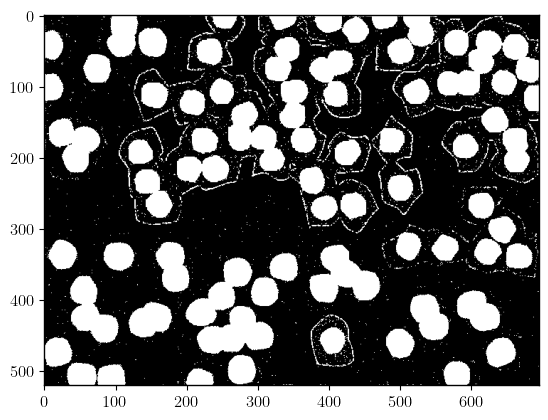

In [87]:
test = np.load(path.join(results_path, "grid_states", "grid_0.npy")).squeeze()
test[test > 0] = 1
plt.imshow(test, cmap="gray", vmin=0, vmax=1)

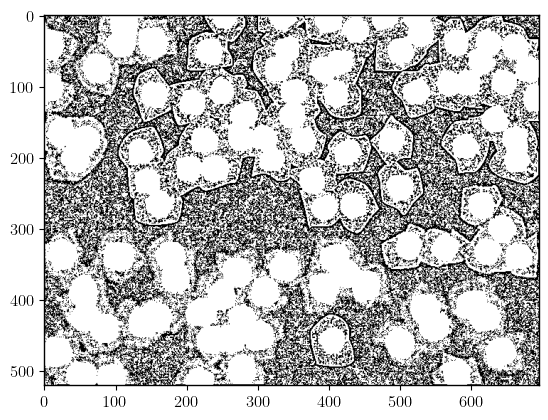

In [91]:
test = np.load(path.join(data_path, "centered_normed2.npy")).squeeze()
test[test > 0] = 1
plt.imshow(test, cmap="gray", vmin=0, vmax=1)

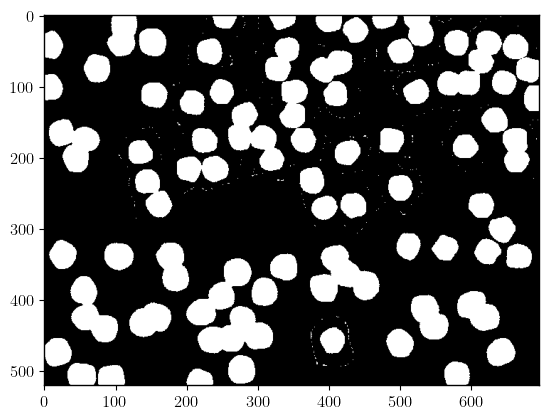

In [94]:
test = np.load(path.join(results_path, "grid_states", "grid_2.npy")).squeeze()
test[test > 0] = 1
plt.imshow(test, cmap="gray", vmin=0, vmax=1)